# DATA VISUALIZATION NOTEBOOK 

### Objectives

* This note book helps meet the clients business requirements 1 as listed below  
  - Average images and variability images for each class (healthy or powdery mildew). 
    - In general the mean and standard deviation is called avergae and variablity. 
    - This will help us meet the Checkbox 1 of Page 2 on our Steamlit Dashboard App
  - The differences between average healthy and average powdery mildew cherry leaves. 
    - This will help us meet the Checkbox 2 of Page 2 on our Steamlit Dashboard App. 
    - We can see three images - Average healthy, Avergae Powdery and Difference in healthy and powdery
  - An image montage for each class - healthy and Powdery Mildew cherry leaves
    - In the Streamlit Dasboard app under Page 2 the client can select a labeel - Healthy or Powdery Mildew
    - This will allow the client to create a montage of ramdom pro-labelled images from the selected images for the selected label.
    - Every time the client clicks the **Create Montage** button, it generates a new montage of random images 
  

### Inputs

* The input for this notebook from the test, train and vaidation datasets created in the DataColelction notebook under the below directories
  - Train Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/train
  - Test Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/test
  - Validate Dataset - /workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves/validation
  

### Outputs

* The output will as below 
  - Image shape embedding pickle file 
  - Mean and Variability of imagess per label plot 
  - Plot to distinguish contrast between parasite-contained and uninfected cell images
  - Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard

### Importance of this notebook

  - This exercise is important to visually differentiate images of one class from another.
  - data visualization for image data is usually limited to creating animage montage to visually differentiate between different pre-labeled images.
  - Understanding the statistical difference between the mean and variability of the images of different classes helps you to anticipate the quality of data for model training.
  



---

### Import Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Change working directory 

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves'

### Set input directories

Set the Path for Train , Test and Validation datasets

In [6]:
my_data_dir = '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

- The output directory will be created as **outputs** and a subdirectory will be cretaed to store different versions of the output.
- We set the initial version to v1.
- Every time the cell is clicked the message **"Old version is already available create a new version."** will be displayeed.
- To create a new version, just chaange the version variable to v2

In [7]:
version = 'v1'
file_path = f'/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

FileExistsError: [Errno 17] File exists: '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1'

### Set label names

Label names for the images will be **healthy** and **powdery_mildew**

In [25]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


## Data visualisation of image data

### OUTPUT 1- Image shape embedding in a pikle file 
Compute average images' size on train set

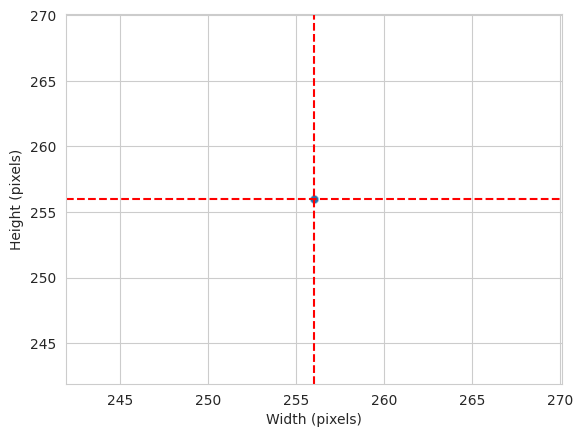

Width average: 256 
Height average: 256


In [26]:
dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(train_path + '/'+ label):
    img = imread(train_path + '/' + label + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1) # image height
    dim2.append(d2) # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Images size for training the model is the average from all image in train set
- We can see that the average image width is 256 pixels, avergae image height is 256 pixels.
- The image also contains 3 gradients , namely RGB- Red, Green and Blue. This is the standard RGB color range. 

In [10]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Save the image shape embeddings.
- We save the image file in a Pikle file in the output folder for further use.
- The file name is image_shape.pkl (pikle extension) 

In [11]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/v1/image_shape.pkl']

## Output 2   - Average and variability of images per label
- Average images and variability images for each class (healthy or powdery mildew). 
- In general the mean and standard deviation is called average and variablity.
- We can use the **average image size** from **output 1** to create the **average mean and variablity of image per label** 

Function to load image data in a an array (TensorFlow)
- To load the image , we use the TensorFlow package 
- In the function below we load the image shape along with their labels
- When defining your image shape to load the images to memory for training the model, choosing 256 × 256 as our image shape will lead to a trained model that will likely be larger than 100Mb.
  -  This model meets the project requirement, but the caveat is to use Git LFS (Large File Storage) to push files larger than 100Mb to GitHub. 
  -  As such our image shape for this function 50 × 50, with the expectation that the model would still meet the performance requirement and will be smaller than 100Mb for a smoother push to GitHub.
  -  This is set using **new_size=(50,50)**
- The number of image is set to 20 using the n_images_per_label field.
- my_data_dir = '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/input/dataset/cherry-leaves'. This is set in the Input Directory Cell earlier. 
- The "img" function below loads the image and their dimensions 
- These images are then stored in a X array Variable - resized, reshaped to the new dimensions 
- The Y array Variable stores the Label name for each image stored in the X Variable.
- The function returns the X and Y array Variables - *this is used to plot the Mean and Variability of Image per Label* 

In [12]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label = 20):
  
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(my_data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(my_data_dir + '/' + label):
      # n_images_per_label: we set a limit, since it may take too much time
      if counter < n_images_per_label:
        
        img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y

2025-04-13 03:34:09.883202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load image shape and labels in array

In [13]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                          n_images_per_label = 30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


Plot and save mean and variability of images per label

In [14]:
def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
  """
   The pseudo code for the function is:
  * Loop in all labels
  * Subset an array for given label
  * Calculate mean and standard deviation
  * Create a figure displaying mean and variability of images
  * Save image

  """

  for label_to_display in np.unique(y):
    sns.set_style("white")

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Variability image for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')

    if save_image:
      plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()
      print("\n")


==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


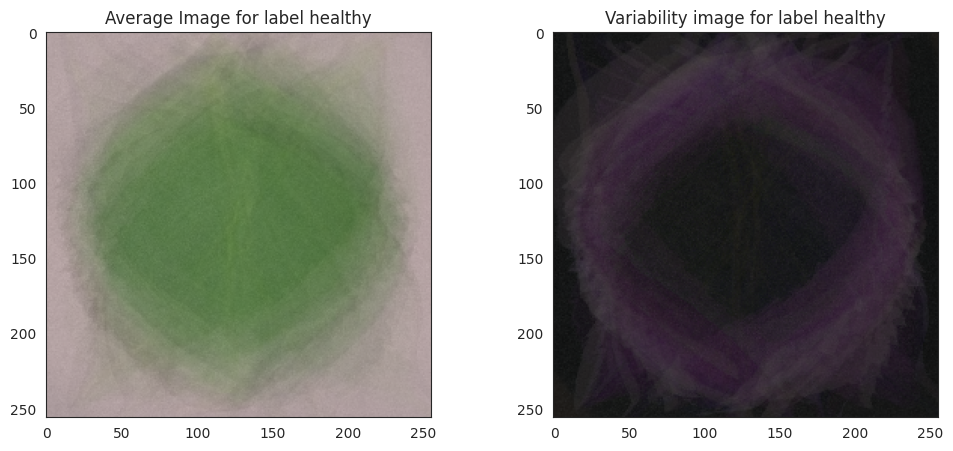

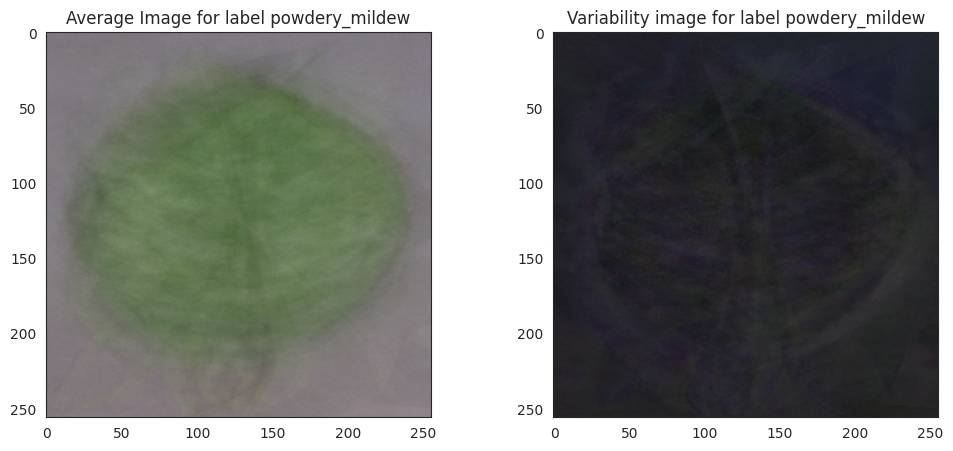

In [15]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5),save_image=True)

Difference between average Healthy and average Powdery Mildew Cherry Leaf image 

In [19]:
def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20,5), save_image=False):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  difference_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(label1_avg, cmap='gray')
  axes[0].set_title(f'Average {label_1}')
  axes[1].imshow(label2_avg, cmap='gray')
  axes[1].set_title(f'Average {label_2}')
  axes[2].imshow(difference_mean, cmap='gray')
  axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
  if save_image:
    plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
  else:
    plt.tight_layout()
    plt.show()

In [20]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy', label_2='Powdery',
                                        figsize=(12,10),
                                        save_image=True
                                        )

Either label powdery_mildew or label Powdery, are not in ['healthy' 'powdery_mildew'] 


Output 4 - Image Montage
- Generate code that answers business requirements 1 and can be used to build an image montage on Streamlit Dashboard app

In [21]:
import itertools
import random
sns.set_style("white")

# logic
# if label exists in the folder
  # check if your montage space is greater tha nsubset size
  # create list of axes indices based on nrows and ncols
  # create a Figure and display images
    # in this loop, load and plot given image


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  

  labels = os.listdir(dir_path)

  # subset the class you are interested to display
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

healthy


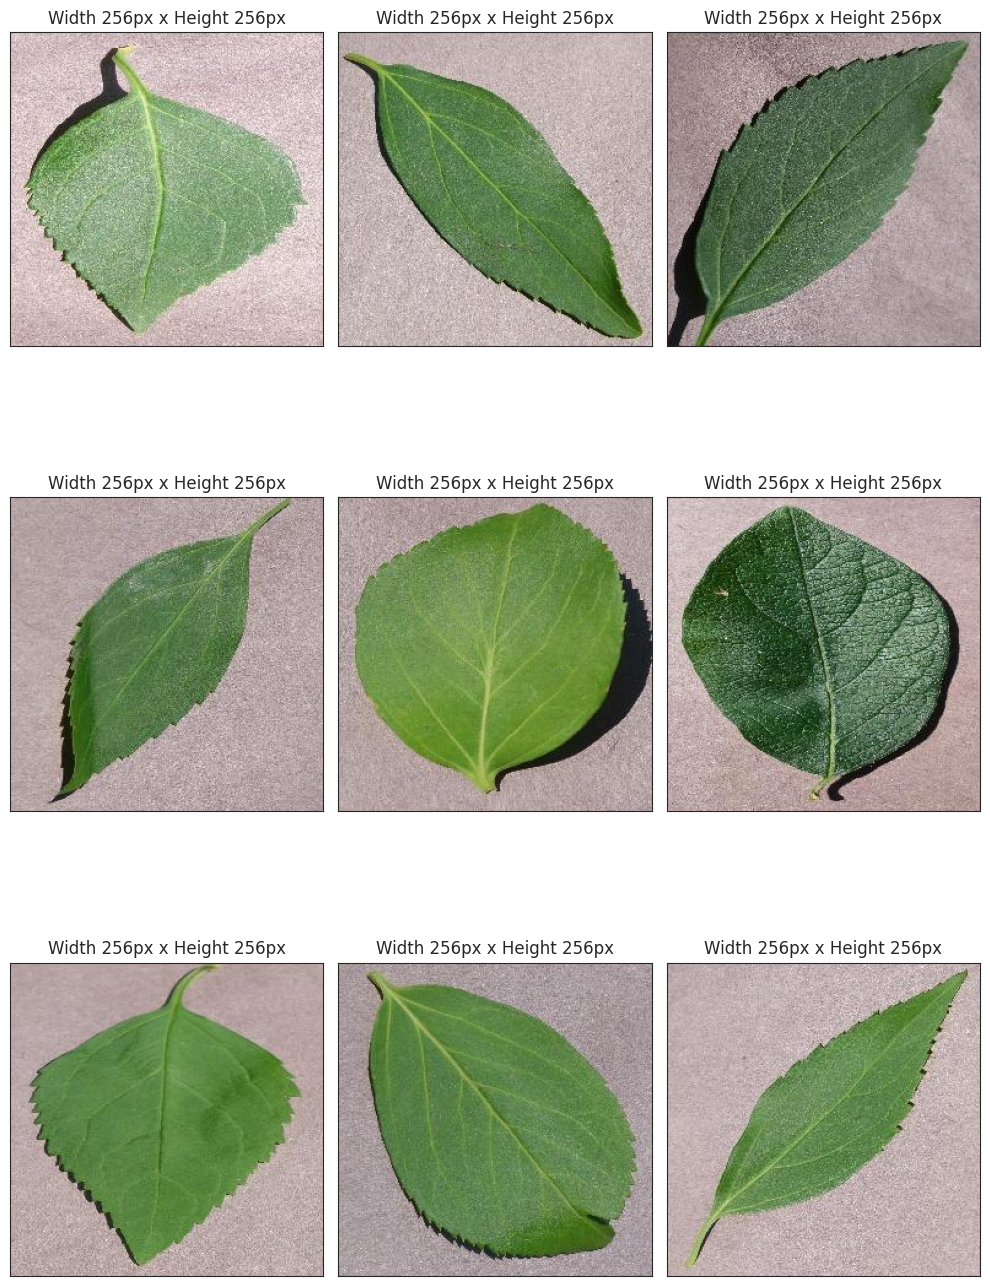



powdery_mildew


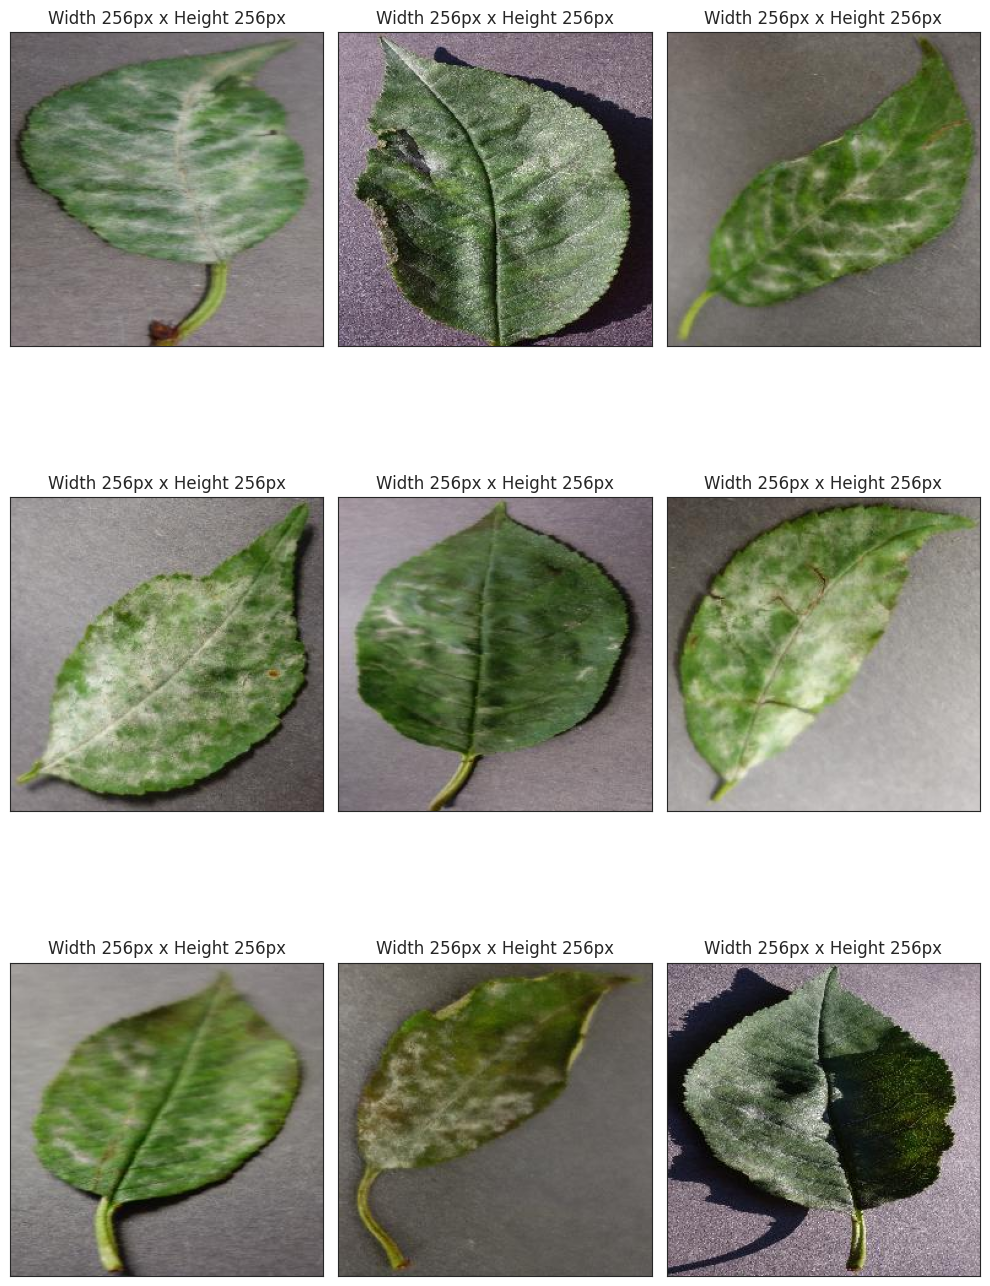

In [22]:
for label in labels:
  print(label)
  image_montage(dir_path= train_path,
                label_to_display= label,
                nrows=3, ncols=3,
                figsize=(10,15)
                )
  print("\n")

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [1]:
import os
try:
    # create here your folder
    os.makedirs(name='/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/')
except Exception as e:
    print(e)


[Errno 17] File exists: '/workspaces/Project5_Mildew_Detection_in_Cherry_Leaves/outputs/'
